# Tensorflow Basics


In [1]:
from __future__ import print_function, division
from builtins import range
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


### Basic Tensorflow data types

#### Tensorflow constant - These are constant tensors

In [2]:
# Creates constant tensors.
a = tf.constant(5, name="A")  # type=int32
b = tf.constant(5.2, name="B", dtype=tf.float32)
print(a, "\t\t", b)

# Constant 1-D Tensor populated with value list.
c = tf.constant([1, 2, 3, 4, 5]) # => [1 2 3 4 5]

# Constant 2-D tensor populated with scalar value -1.
D = tf.constant(-1.0, shape=[2, 3]) # => [[-1. -1. -1.], [-1. -1. -1.]]
print(c, "\t", D)

sess = tf.Session()
print("a =", sess.run(a), "b =", sess.run(b))
print("c =", sess.run(c))
print("D =\n", sess.run(D))
sess.close()


Tensor("A:0", shape=(), dtype=int32) 		 Tensor("B:0", shape=(), dtype=float32)
Tensor("Const:0", shape=(5,), dtype=int32) 	 Tensor("Const_1:0", shape=(2, 3), dtype=float32)
a = 5 b = 5.2
c = [1 2 3 4 5]
D =
 [[-1. -1. -1.]
 [-1. -1. -1.]]


### Computational Graphs in TensorFlow

Computation in Tensorflow is defined with dataflow graphs. The advantage with this aproach is that the execution model is separated from its execution. Same computation graph can be executed on CPU, GPU, TPU or any combination of these. Once Computational Graphs is implemented, TensorFlow can execute it on any given hardware (execution complexity is taken care by Tensorflow). 

#### Tensorflow Placeholder - These are placeholder for a tensor.

In TensorFlow, placeholder is way to inject data into the computation graph. 
Its value must be fed using the feed_dict optional argument to Session.run(), Tensor.eval(), or Operation.run()

The advantage of placeholders is that they allow creation of computational graph without needing to provide the data in advance. The data can be fed to graph in runtime from external sources.

In [3]:
x = tf.placeholder(tf.float32, shape=4)
y = tf.placeholder(tf.float32, shape=(3, 3))

# If the shape isn’t passed, this tensor can be fed with any shape. 
z = tf.placeholder(tf.float32)


with tf.Session() as sess:
    print("x =\n", sess.run(x, feed_dict={x: [1, 2, 3, 4]}))
    array = np.random.rand(3, 3)
    print("y =\n", sess.run(y, feed_dict={y: array}))
    print("z =\n", sess.run(z, feed_dict={z: array}))
    # We can use indices with Tensors
    print("z[0] =\n", sess.run(z[0], feed_dict={z: array}))
    print("z[0][0] =\n", sess.run(z[0][0], feed_dict={z: array}))


x =
 [1. 2. 3. 4.]
y =
 [[0.7205774  0.4490452  0.62983674]
 [0.61860764 0.42719045 0.34289327]
 [0.39360616 0.3234309  0.22338091]]
z =
 [[0.7205774  0.4490452  0.62983674]
 [0.61860764 0.42719045 0.34289327]
 [0.39360616 0.3234309  0.22338091]]
z[0] =
 [0.7205774  0.4490452  0.62983674]
z[0][0] =
 0.7205774


### Addition of two matrix in Tensorflow

In [4]:
a = tf.placeholder(tf.int32, shape=4)
b = tf.placeholder(tf.int32, shape=4)

# Equation to compute sum, it will compute the equation and assign outputs
c = tf.add(a, b)

with tf.Session() as session:
    print("\t", [1, 2, 3, 4], "\n+\t",[5, 6, 7, 8])
    print("=\t", session.run(c, feed_dict={a: [1, 2, 3, 4], b: [5, 6, 7, 8]}))


	 [1, 2, 3, 4] 
+	 [5, 6, 7, 8]
=	 [ 6  8 10 12]


### Dot product of two Tensors

In [5]:
# we can define a matrix multiplication
A = tf.placeholder(tf.int32, shape=(2, 2))
b = tf.placeholder(tf.int32, shape=2)
# Dot product of A and b
w = tf.reduce_sum(tf.multiply(A, b), 1)

# let's import numpy so we can create real arrays
A_val = np.array([[1,2], [3,4]])
v_val = np.array([5,6])

print("A=\n", A_val)
print("v=\n", v_val)
with tf.Session() as session:
    print("A . v =\t", session.run(w, feed_dict={A: A_val, b: v_val}))


A=
 [[1 2]
 [3 4]]
v=
 [5 6]
A . v =	 [17 39]


### Tensorflow Variable - Variables represent shared, persistent state manipulated by program.

Unlike tf.Tensor objects, a tf.Variable exists outside the context of a single session.run call.

In [6]:
# Create a variable.
p = tf.Variable([[1, 2, 3], [4, 5, 6], [7, 8, 9]], name="P", dtype=tf.float32)
q = tf.Variable([[9, 8, 7], [6, 5, 4], [3, 2, 1]], name="Q", dtype=tf.float32)

print(p)
print(q)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    print(sess.run(init)) # "run" the init operation
    print("Before assignment, p =\n", sess.run(p))
    print(sess.run(q))
    sess.run(p.assign(q))
    sess.run(q.assign(np.random.rand(3, 3)))
    
    print("After assignment, p =\n", sess.run(p))
    print(sess.run(q))


<tf.Variable 'P:0' shape=(3, 3) dtype=float32_ref>
<tf.Variable 'Q:0' shape=(3, 3) dtype=float32_ref>
None
Before assignment, p =
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[9. 8. 7.]
 [6. 5. 4.]
 [3. 2. 1.]]
After assignment, p =
 [[9. 8. 7.]
 [6. 5. 4.]
 [3. 2. 1.]]
[[0.0591979  0.18780138 0.7509941 ]
 [0.706089   0.12316325 0.12767106]
 [0.0633887  0.28930205 0.49127215]]


### Compute y = ax +b

In [7]:
# Define coefficients
a = tf.constant(5.0, name="a", dtype=tf.float32)
b = tf.constant(10.0, name="b", dtype=tf.float32)

# Define input placeholder
x = tf.placeholder(tf.float32, shape=(4, 4))

# Define output 
y = tf.add(tf.multiply(a, x), b)

with tf.Session() as session:
    array = np.random.rand(4, 4)
    print("x =\n", array)
    print("y =\n", session.run(y, feed_dict={x: array}))


x =
 [[0.06197579 0.62424758 0.99894093 0.49289114]
 [0.14302678 0.11926704 0.91377828 0.02354772]
 [0.89678956 0.92732595 0.05167654 0.00626998]
 [0.3494985  0.24039334 0.86795942 0.24668019]]
y =
 [[10.309879 13.121238 14.994705 12.464456]
 [10.715134 10.596335 14.568892 10.117739]
 [14.483948 14.63663  10.258383 10.03135 ]
 [11.747493 11.201967 14.339797 11.233401]]


### Accumulation

In [8]:
# Create placeholder for input
inp = tf.placeholder(tf.int32, shape=4)

# TensorFlow variables are like Theano shared variables.
# But Theano variables are like TensorFlow placeholders.

# Create a variable.
acc = tf.Variable([0, 0, 0, 0], name="Acc")
add = acc + inp

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init) # "run" the init operation
    sess.run(acc.assign(add), feed_dict={inp: [1, 2, 3, 4]})
    sess.run(acc.assign(add), feed_dict={inp: [1, 2, 3, 4]})
    print(sess.run(acc.assign(add), feed_dict={inp: [1, 2, 3, 4]}))


[ 3  6  9 12]


### Implementing gradient descent with Tensorflow

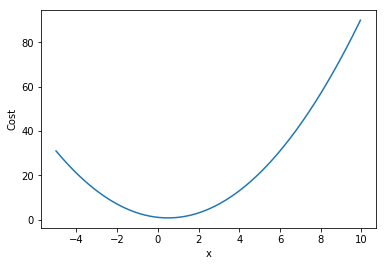

Iteration 0 	cost = 15.190, x = 4.300
Iteration 1 	cost = 3.060, x = 2.020
Iteration 2 	cost = 1.120, x = 1.108
Iteration 3 	cost = 0.809, x = 0.743
Iteration 4 	cost = 0.759, x = 0.597
Iteration 5 	cost = 0.752, x = 0.539
Iteration 6 	cost = 0.750, x = 0.516
Iteration 7 	cost = 0.750, x = 0.506
Iteration 8 	cost = 0.750, x = 0.502
Iteration 9 	cost = 0.750, x = 0.501
Iteration 10 	cost = 0.750, x = 0.500
Iteration 11 	cost = 0.750, x = 0.500
Iteration 12 	cost = 0.750, x = 0.500
Iteration 13 	cost = 0.750, x = 0.500
Iteration 14 	cost = 0.750, x = 0.500
Iteration 15 	cost = 0.750, x = 0.500
Iteration 16 	cost = 0.750, x = 0.500
Iteration 17 	cost = 0.750, x = 0.500
Iteration 18 	cost = 0.750, x = 0.500
Iteration 19 	cost = 0.750, x = 0.500

Value of x to minimize the cost function = 0.5000001


In [9]:
# Let's create a variable so we can do gradient descent
# Here, the first argument is variable's initial value, the second is it's name
x = tf.Variable(10.0, 'x')

# A cost function that has a minimum value
cost = x*x - x + 1

# Plot the cost function
xvals = np.arange(-5, 10, 0.05) # Grid of 0.05 spacing from -5 to 10
yvals = xvals*xvals - xvals + 1 # Evaluate function on xvals
plt.plot(xvals, yvals) # Create line plot with yvals against xvals
plt.xlabel("x")
plt.ylabel("Cost")
plt.show() # Show the figure

# In Tensorflow, you need to choose an optimizer that implements the learning algorithm you want.
# Here 0.3 is leaarning rate
train_op = tf.train.GradientDescentOptimizer(0.3).minimize(cost)

# let's run a session again
init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)

    # In Theano, weight updates need to be specified explicitely.
    # In Tensorflow, weight update is automatic, but the loop itself is not.
    # So we'll just call train_op until convergence.
    for i in range(20):
        session.run(train_op)
        print("Iteration", i, "\tcost = %.3f, x = %.3f" % (cost.eval(), x.eval()))
    
    # Print the optimal value of x
    print("\nValue of x to minimize the cost function =", x.eval())
